# Otsu Thresholding 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 ,os
from math import ceil

def get_images_names(path):
    files_name = os.listdir( path )
    files_name.sort()
    return files_name

def read_imges(path,images_name):
    images= []
    if isinstance(images_name,str):
        img = cv2.imread(path+images_name,0)
        if img is not None:
            img = cv2.GaussianBlur(img, (3, 3), 0)
            return img
        else:
            print('Can not read image files!',path+images_name)
    else:
        for image in images_name:
            img = cv2.imread(path+image,0)
            if img is not None:
                img = cv2.GaussianBlur(img, (3, 3), 0)
                images.append(img)
            else:
                print('Can not read image files!',path+image)
    return images

def segment_images(images):
    seg_images=[]
    for image in images:
        otsu_threshold, otsout = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
        seg_images.append(np.array(otsout))
    return seg_images
        

def get_images_pixels(segmented_images,value,multipleImages):
    foreground_pixels = []
    foreground_pixels_images=[]
    if multipleImages:
#         print("segment multi images ..")
        for img in segmented_images:
            for y in range(img.shape[0]):
                # iterate through width
                for x in range(img.shape[1]):
                    # if this is a foreground pixel
                    if img[y, x] == value:
                        foreground_pixels.append(np.array((x, y))) # add it to my list of (x, y) coordinate pairs
            foreground_pixels_images.append(np.array(foreground_pixels))
        return foreground_pixels_images        
    else:
#         print("segment one image ..")
        for img in segmented_images:
            for y in range(img.shape[0]):
                # iterate through width
                for x in range(img.shape[1]):
                    # if this is a foreground pixel
                    if img[y, x] == value:
                        foreground_pixels.append(np.array((x, y))) # add it to my list of (x, y) coordinate pairs
        return foreground_pixels

def get_total_point(image,multipleImages):
    if multipleImages:
        for i in range(len(image)):
            print('Number of points for image',i+1,'are:',len(image[i]))
    else:
        print('Number of points for image are:',len(image))

def show(images,multipleImages):
    if multipleImages:
#         print('show multiImages')
        plt.figure(figsize=(8, 8))
        for i in range(len(images)):
            plt.subplot((ceil(len(images)/2)),2,i+1),plt.imshow(images[i],'gray')
            plt.title(i)
    else:
#         print('show one image')
        plt.figure(figsize=(8, 8))
        plt.imshow(images,'gray')


## for single image thresholding

image names: ['Abyssinian_1.jpg', 'Abyssinian_109.jpg', 'Abyssinian_115.jpg', 'Abyssinian_129.jpg', 'Abyssinian_135.jpg'] ...

Read [ Abyssinian_1.jpg ]
image is segmented ...
image points are collected ...
Number of points for image are: 148770
image points: [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [  0 597]
 [  0 598]
 [  0 599]]


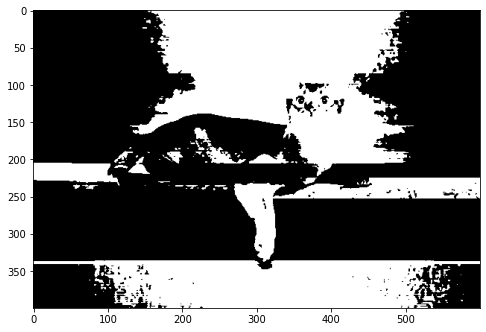

In [2]:
# ------------ to segment single image ---------------
# 0 means to segment one image or 1 to multiple images 
multipleImages = 0
forgroundValue = 0 # for background 255
path='test/'
#get all images name
images_name = get_images_names(path)
print('image names:',images_name[:5],'...\n')
#read three image
images = read_imges(path,images_name[0]) # read 2nd image
print('Read [',images_name[0],']')

#segment the image based on Otsu's method
seg = segment_images(images)
print('image is segmented ...')
# 
images_points = get_images_pixels(seg,forgroundValue,multipleImages)
print('image points are collected ...')

get_total_point(images_points,multipleImages)

print('image points:',np.array(images_points))
show(seg,multipleImages)

## for multi images thresholding

Read: ['Abyssinian_154.jpg', 'Abyssinian_155.jpg', 'Abyssinian_16.jpg', 'Abyssinian_160.jpg']
Images are segmented ...
Images points are collected ...
Number of points for image 1 are: 122527
Number of points for image 2 are: 236770
Number of points for image 3 are: 368708
Number of points for image 4 are: 438335
image points: [[ 85   0]
 [ 86   0]
 [ 87   0]
 ...
 [499 363]
 [498 364]
 [499 364]]
image points: [[ 85   0]
 [ 86   0]
 [ 87   0]
 ...
 [578 370]
 [579 370]
 [580 370]]
image points: [[ 85   0]
 [ 86   0]
 [ 87   0]
 ...
 [388 334]
 [389 334]
 [390 334]]
image points: [[ 85   0]
 [ 86   0]
 [ 87   0]
 ...
 [478 374]
 [479 374]
 [480 374]]


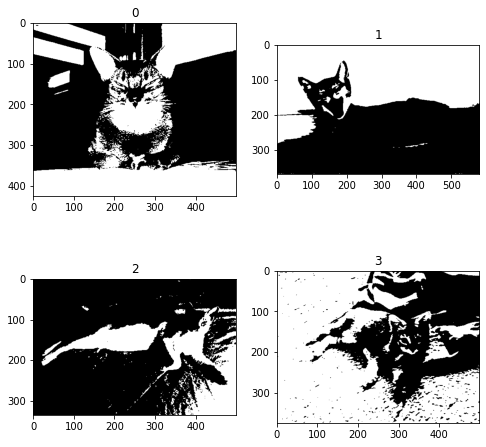

In [3]:
# ------------ to segment multi images for (dataset) ---------------

# 0 means to segment one image or 1 to multiple images 
multipleImages = 1
forgroundValue = 0
path='test/'
#get all images name
images_name = get_images_names(path)
#read 4 images
images = read_imges(path,images_name[10:14])
print('Read:',images_name[10:14])

#segment the image based on Otsu's method
seg = segment_images(images)
print('Images are segmented ...')
# 
images_points = get_images_pixels(seg,forgroundValue,multipleImages)
print('Images points are collected ...')

get_total_point(images_points,multipleImages)

# to go through each images points 
for each in images_points:
    print('image points:',each)

show(seg,multipleImages)